In [1]:
!pip install PySpark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 13.1 MB/s eta 0:00:00
  Created wheel for PySpark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a71f11a1faf5c2799a5a0a21427e3c6584bdbff056ccd2a7deb561e44153e7f1
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built PySpark


In [3]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pyspark.pandas as ps

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
spark = SparkSession.builder.appName("bike").getOrCreate()
df = spark.read.option("header","true").csv("/content/gdrive/MyDrive/Colab Notebooks/2017-fordgobike-tripdata.csv")

In [12]:
g_df = df.groupBy("user_type").agg({"*": "count"})
g_df = g_df.withColumnRenamed("count(1)", "count")
t_count = df.count()
g_df = g_df.withColumn("percentage", round(g_df["count"] / t_count * 100,2))
g_df.show()

+----------+------+----------+
| user_type| count|percentage|
+----------+------+----------+
|Subscriber|409230|     78.74|
|  Customer|110470|     21.26|
+----------+------+----------+



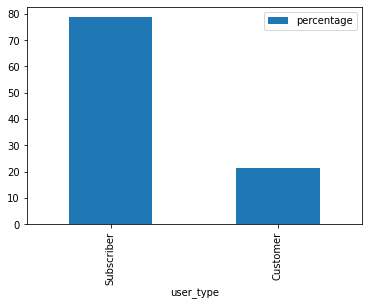

In [8]:
g_df.toPandas().plot(x='user_type', y='percentage', kind='bar')